In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster
from random import randint
from time import sleep
from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import sys
import requests
import spotipy.util as util
from random import randint
from time import sleep

In [187]:
import getpass
client_id = getpass.getpass()

········


In [189]:
client_secret = getpass.getpass()

········


In [190]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [346]:
playlist_spotify = pd.read_csv("/Users/amandamac/IronHackerDA/lab-web-scraping-single-page/playlist_spotify.csv")

In [347]:
hot_songs = pd.read_csv("/Users/amandamac/IronHackerDA/lab-web-scraping-single-page/hot_songs.csv")

In [348]:
playlist_spotify = playlist_spotify.drop("Unnamed: 0", axis=1)
#playlist_spotify.head()

In [349]:
#playlist_spotify.dtypes

In [350]:
playlist_spotify_model = playlist_spotify.select_dtypes(include=np.number)

In [351]:
playlist_spotify_model

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.179000,0.000000,0.6890,0.625,129.965,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.371000,0.000007,0.1090,0.620,78.558,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.075500,0.000000,0.2710,0.571,127.435,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.284000,0.000000,0.4050,0.758,100.024,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.597,0.931,11,-4.591,0,0.0984,0.127000,0.000000,0.0504,0.534,92.003,235200,4
7838,0.420,0.952,7,-4.930,1,0.2570,0.001150,0.000057,0.2940,0.511,191.977,158733,4
7839,0.522,0.751,1,-5.460,1,0.0435,0.000491,0.000002,0.1580,0.605,139.510,232067,3
7840,0.520,0.945,1,-4.197,1,0.0335,0.005990,0.000050,0.0495,0.807,99.603,179600,4


In [388]:
scaler = StandardScaler().fit(playlist_spotify_model)

X_prep = scaler.transform(playlist_spotify_model)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=playlist_spotify_model.columns).head()

kmeans = KMeans(n_clusters=9, n_init = 10, random_state = 1234)
y_kmeans = kmeans.fit_predict(X_prep)

# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1869
1    1213
2     690
3     938
4     639
5    1302
6     551
7     207
8     433
dtype: int64

In [389]:
clusters

array([0, 8, 2, ..., 7, 1, 5], dtype=int32)

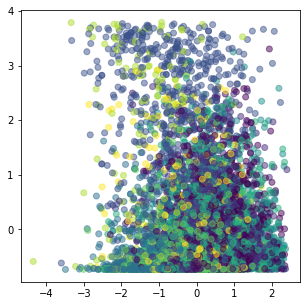

In [390]:
plt.figure(figsize=(5,5))
plt.scatter(X_prep[:,0], X_prep[:,6], c=clusters, alpha=0.5)
plt.show()

In [391]:
kmeans.inertia_

57269.575505486486

In [386]:
kmeans = KMeans(n_clusters=12,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=40,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

53286.56717333396


Choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

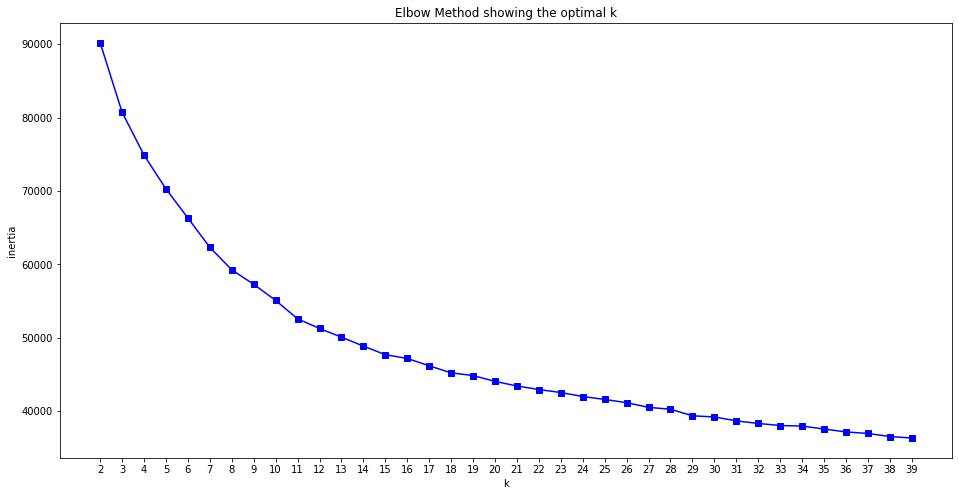

In [384]:
K = range(2, 40)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bs-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

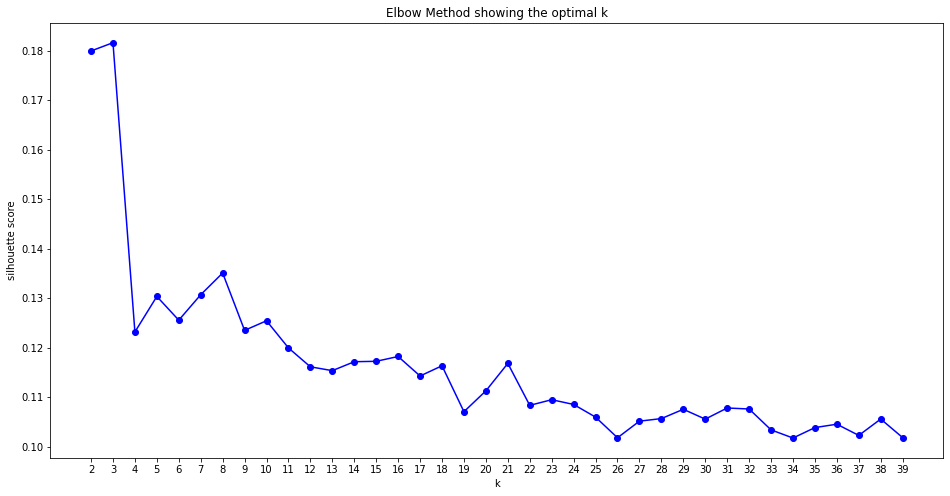

In [385]:
K = range(2, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bo-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [392]:
clusters = pd.Series(clusters)
playlist_spotify_cluster = pd.concat([playlist_spotify, clusters], axis=1)
playlist_spotify_cluster= playlist_spotify_cluster.rename(columns={0: 'cluster'})
playlist_spotify_cluster.to_csv("playlist_spotify_cluster.csv")

In [399]:
def features(track, artist):
    query = track + " " + artist
    track_id = sp.search(q= query, type="track,artist", limit=10)
    if len(track_id["tracks"]["items"]) > 0:
        uri= track_id["tracks"]["items"][0]["uri"]
        features = sp.audio_features(uri)
        song_df = pd.DataFrame(features)
        song_df = song_df.select_dtypes(include=np.number)
        song_df = scaler.transform(song_df)
        clusters_new_song = kmeans.predict(song_df)
        clusters_new_song = pd.Series(clusters_new_song).values[0]
        return clusters_new_song
    
    return -1

In [401]:
features("Dig Dig Joy", "Sandy&Junior")

0

In [403]:
#loking in the songs

print("Hi, let's play a song! Choose a music and an artist:")
sleep(randint(1,3))

song = input("Song Name: ")
artist= input("Artist name: ")

choice = hot_songs.loc[(hot_songs['song'].str.lower() == song.lower()) & (hot_songs['artist'].str.lower() == artist.lower())]

if len(choice) > 0:
    suggest = hot_songs.sample()
    print("Maybe you can like this another hot song:", suggest['song'], suggest['artist'])
    sleep(randint(1,3))
else:
    print("Not Found in Hot songs, searching in our recomendations")
    choice2 = playlist_spotify_cluster.loc[(playlist_spotify_cluster['track_name'].str.lower() == song.lower()) & (playlist_spotify_cluster['artist'].str.lower() == artist.lower())]
    if len(choice2) > 0:
        suggest = playlist_spotify_cluster.loc[playlist_spotify_cluster["cluster"]==choice2["cluster"].values[0]].sample()
        print("Maybe you can like this music: ", suggest['track_name'].values[0],"- ", suggest['artist'].values[0])
        sleep(randint(1,3))
    else: 
        cluster_features = features(song, artist)
        if cluster_features >=0:
            suggest = playlist_spotify_cluster.loc[playlist_spotify_cluster["cluster"]==cluster_features].sample()
            print("Maybe you can like this song: ", suggest['track_name'].values[0],"- ", suggest['artist'].values[0])
            sleep(randint(1,3))
        else:
            print("I can't find this song. Try another music")

Hi, let's play a song! Choose a music and an artist:
Song Name: Rebelde
Artist name: RBD
Not Found in Hot songs, searching in our recomendations
Maybe you can like this song:  Bittersweet Symphony (feat. Emily Roberts) -  GAMPER & DADONI
